<a href="https://colab.research.google.com/github/EjazAlam9006/play-store-app-reveiw-analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

##Importing Important Libraries

In [69]:
#Importing Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##Mounting and Reading Csv file of Google Play Store Application Dataset

In [70]:
#Mounting File
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
#Reading Csv file
dir = '/content/drive/MyDrive/Almabetter Data /Capstone Projects Dataset/Capstone Project 1/Google Play Store Application/'
play_store_app_df =pd.read_csv(dir + 'Play Store Data.csv')
user_reviews_df = pd.read_csv('/content/drive/MyDrive/Almabetter Data /Capstone Projects Dataset/Capstone Project 1/Google Play Store Application/ User Reviews.csv')

In [72]:
#making a copy of original Play store data to df
df = play_store_app_df.copy()

#Checking Basic Composition of Play Store Dataset

---



In [73]:
#To get the contents of columns
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [74]:
#to get the number of Rows and Columns
df.shape

(10841, 13)

In [75]:
#to get the overview of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [76]:
#Descriptive statistics
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


#Checking Data Composition of User Reviews Dataset

---

In [77]:
#making a copy of user reviews dataset to ur_df
ur_df= user_reviews_df.copy()

In [78]:
#To get the contents of columns
ur_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [79]:
#to get the number of Rows and Columns
ur_df.shape

(64295, 5)

In [80]:
#to get the overview of dataset
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


##Data Cleaning of Play Store Dataset

---

In [81]:
#Checking for Duplicate entries of a single application
df['App'].value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [82]:
#removing duplicate entries with exact similarities
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [83]:
df['App'].value_counts()

ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Theme Android P Black design for LG V30          1
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9660, dtype: int64

In [84]:
#df_new[df_new['App'] == 'Duolingo: Learn Languages Free']
df[df['App'] == 'Candy Crush Saga']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1655,Candy Crush Saga,GAME,4.4,22426677,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1705,Candy Crush Saga,GAME,4.4,22428456,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1842,Candy Crush Saga,GAME,4.4,22429716,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
1869,Candy Crush Saga,GAME,4.4,22430188,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up
3994,Candy Crush Saga,FAMILY,4.4,22419455,74M,"500,000,000+",Free,0,Everyone,Casual,"July 5, 2018",1.129.0.2,4.1 and up


As we can notice that a single application has more duplicate applications  with different number of reviews and with different Categories.

In [85]:
#dropping all the duplicates of an app and keeping the first entry of the app 
df.drop_duplicates(subset=['App'],keep='first',inplace=True,ignore_index=True)
df['App'].value_counts()

Photo Editor & Candy Camera & Grid & ScrapBook    1
CK Pharmacies                                     1
CK Call NEW                                       1
Ck Coif                                           1
CONTRACT KILLER: ZOMBIES                          1
                                                 ..
Bike Race Free - Top Motorcycle Racing Games      1
Dance School Stories - Dance Dreams Come True     1
3D Bowling                                        1
Mind Games Pro                                    1
iHoroscope - 2018 Daily Horoscope & Astrology     1
Name: App, Length: 9660, dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 981.2+ KB


In [87]:
df['Category'].value_counts()

FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

In [88]:
df[df['Category']=='1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [89]:
#removing data with improper entry of Category
df.drop(9300,axis=0,inplace=True)
df.reset_index(inplace=True)
df['Category'].value_counts()


FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   index           9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   object 
 5   Size            9659 non-null   object 
 6   Installs        9659 non-null   object 
 7   Type            9658 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(1), int64(1), object(12)
memory usage: 1.0+ MB


In [91]:
df[df['Type'].isnull()]

,index,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8028,8028,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [92]:
#dropping useless data
df.drop(8028,axis=0,inplace=True)

In [93]:
#dropping index column and removing '$' sign from ['Price']
df.drop(columns=['index'],axis=0,inplace=True)
df['Price'] = pd.to_numeric(df['Price'].str.replace('$',''))

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9658 non-null   object 
 4   Size            9658 non-null   object 
 5   Installs        9658 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9658 non-null   float64
 8   Content Rating  9658 non-null   object 
 9   Genres          9658 non-null   object 
 10  Last Updated    9658 non-null   object 
 11  Current Ver     9650 non-null   object 
 12  Android Ver     9656 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [95]:
#Checking null values of 'Current Ver' and 'Android Ver' columns
df[df['Current Ver'].isna()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0.00,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1265,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0.00,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
5314,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0.00,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
5772,BT Master,FAMILY,NaN,0,222k,100+,Free,0.00,Everyone,Education,"November 6, 2016",NaN,1.6 and up
6287,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
6360,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0.00,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
6671,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
9170,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0.00,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


In [96]:
#Setting the null values of columns 'Current Ver' and 'Android Ver' as 'Missing'
df['Current Ver'].fillna('Missing',inplace=True)
df['Android Ver'].fillna('Missing',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9658 non-null   object 
 4   Size            9658 non-null   object 
 5   Installs        9658 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9658 non-null   float64
 8   Content Rating  9658 non-null   object 
 9   Genres          9658 non-null   object 
 10  Last Updated    9658 non-null   object 
 11  Current Ver     9658 non-null   object 
 12  Android Ver     9658 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [97]:
#Replacing NaN values of Rating to mean of Rating
df.loc[df['Rating'].isna(),'Rating'] = df.loc[~df['Rating'].isna(),'Rating'].mean()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          9658 non-null   float64
 3   Reviews         9658 non-null   object 
 4   Size            9658 non-null   object 
 5   Installs        9658 non-null   object 
 6   Type            9658 non-null   object 
 7   Price           9658 non-null   float64
 8   Content Rating  9658 non-null   object 
 9   Genres          9658 non-null   object 
 10  Last Updated    9658 non-null   object 
 11  Current Ver     9658 non-null   object 
 12  Android Ver     9658 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.0+ MB


In [98]:
#Removing '+' & ','from ['Installs']
df['Installs'] = df['Installs'].apply(lambda x: x.rstrip('+'))
df['Installs'] = pd.to_numeric(df['Installs'].str.replace(',',''))
df['Installs'].head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int64

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          9658 non-null   float64
 3   Reviews         9658 non-null   object 
 4   Size            9658 non-null   object 
 5   Installs        9658 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9658 non-null   float64
 8   Content Rating  9658 non-null   object 
 9   Genres          9658 non-null   object 
 10  Last Updated    9658 non-null   object 
 11  Current Ver     9658 non-null   object 
 12  Android Ver     9658 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.0+ MB


In [100]:
#Checking the number of apps in Free and Paid type
app_type_df=df['Type'].value_counts()
app_type_df


Free    8902
Paid     756
Name: Type, dtype: int64

#Question 1: What percentage of apps are paid and free?

---

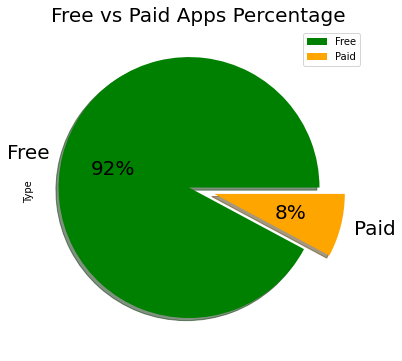

In [101]:
#Plotting pie chart of free vs paid apps

plt.rcParams['figure.figsize']=(6,6)
type_pie=app_type_df.plot(kind='pie',autopct='%1.0f%%',fontsize=20,shadow=True, colors=['green','orange'],explode=(0.10,0.10))
type_pie.set_title("Free vs Paid Apps Percentage ",fontsize=20)
plt.legend()

Here we can see that most of the apps (92%) are free and only 8% of apps are paid.

##What percentage of Applications targetting users considering age as a factor? 

In [102]:
df['Content Rating'].value_counts()

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

#How does size impact on the number of installs of any application?

In [103]:
# Converting KB to MB 
df['Size'] = df['Size'].apply(lambda x: str(x).replace('Varies with device', 'NaN') if 'Varies with device' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: str(x).replace(',', '') if 'M' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)
df['Size'] = df['Size'].apply(lambda x: float(x))

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9658 entries, 0 to 9658
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9658 non-null   object 
 1   Category        9658 non-null   object 
 2   Rating          9658 non-null   float64
 3   Reviews         9658 non-null   object 
 4   Size            8432 non-null   float64
 5   Installs        9658 non-null   int64  
 6   Type            9658 non-null   object 
 7   Price           9658 non-null   float64
 8   Content Rating  9658 non-null   object 
 9   Genres          9658 non-null   object 
 10  Last Updated    9658 non-null   object 
 11  Current Ver     9658 non-null   object 
 12  Android Ver     9658 non-null   object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.0+ MB


In [105]:
df['log_installs'] = np.log10(df['Installs'])
categoty_type_installs =df.groupby(['Category','Type'])[['Installs']].sum().reset_index()

In [106]:
categoty_type_installs['log_Installs'] = np.log2(categoty_type_installs['Installs'])

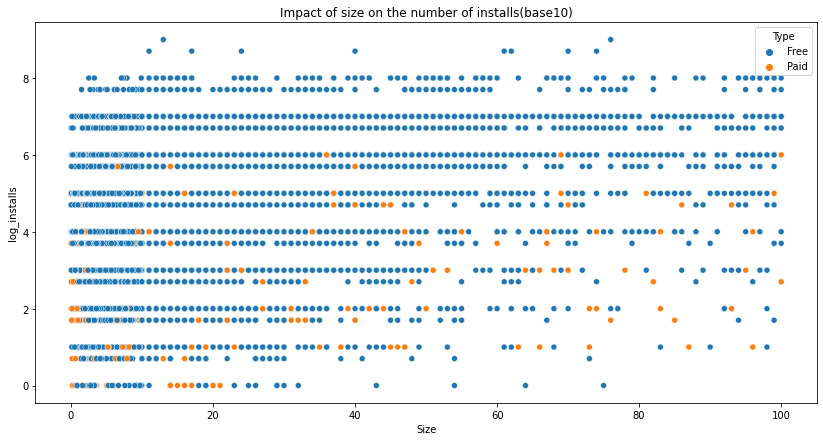

In [107]:
plt.figure(figsize=(14,7))
plt.title("Impact of size on the number of installs(base10)")
sns.scatterplot(df['Size'], df['log_installs'], hue=df['Type'])
plt.show()

In [39]:
ur_df.dropna(subset= ['Sentiment'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37432 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37432 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


#Merging dataframes on apps

In [41]:
merged_df = df.merge(ur_df, on="App")

In [42]:
merged_df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,log_installs,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,A kid's excessive ads. The types ads allowed a...,Negative,-0.250000,1.000000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,It bad >:(,Negative,-0.725000,0.833333
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,like,Neutral,0.000000,0.000000
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,I love colors inspyering,Positive,0.500000,0.600000
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,I hate,Negative,-0.800000,0.900000
5,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,omgggggg,Neutral,0.000000,0.000000
6,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,It cute.,Positive,0.500000,1.000000
7,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,I love,Positive,0.500000,0.600000
8,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,Love,Positive,0.500000,0.600000
9,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,5.69897,I love enjoyable fun,Positive,0.433333,0.466667


In [44]:
#Checking for Duplicate values
merged_df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
35929    False
35930    False
35931    False
35932    False
35933    False
Length: 35934, dtype: bool